# **Training Artificial Neural Networks on Numerical Data**

## **Data Preparation and Processing - (Video4 - Keras with TensorFlow - Data Processing for Neural Network Training)**

In [ ]:
# Imports from Video 4 - Data Preparation and Processing
# Source link: https://www.youtube.com/watch?v=3FwGDUD_ZuQ&list=PLkUrsn8FkQFb5Gr_CY7HQErZRr6mPb-2q&index=4

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# Imports from Video 5 - Create an Artificial Neural Network with TensorFlow's Keras API 
# Source link: https://www.youtube.com/watch?v=HrfrN3hn7QE&list=PLkUrsn8FkQFb5Gr_CY7HQErZRr6mPb-2q&index=5

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense

# Imports needed for Video 6 - Train an Artificial Neural Network with TensorFlow's Keras API
# Source link: https://www.youtube.com/watch?v=I8eI4ZhcYdM&list=PLkUrsn8FkQFb5Gr_CY7HQErZRr6mPb-2q&index=6
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

## **Inputs and Labels Intialization for Train dataset** 

In [ ]:
train_labels = []
train_samples = []

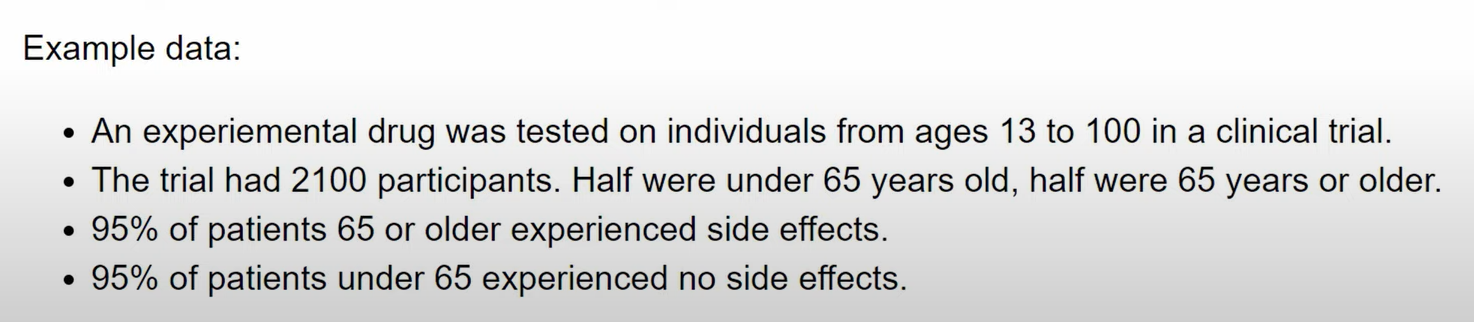

In [ ]:
for i in range(50):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range(1000):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    #The 95% older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [ ]:
for i in train_samples:
    print(i)

In [ ]:
for i in train_labels:
    print(i)

In [ ]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [ ]:
#print scaled data
for i in scaled_train_samples:
    print(i)

## **Simple tf.keras Sequential Model (Video5 - Create an Artificial Neural Network with TensorFlow's Keras API)**

In [ ]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [ ]:
model.summary()

## **Video6 - Train an Artificial Neural Network with TensorFlow's Keras API**

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## **Add Validation Split (Video7 - Build a Validation Set With TensorFlow's Keras API)**

In [ ]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

## **Preprocess Test Dataset (Video8 - Neural Network Predictions with TensorFlow's Keras API)**

In [ ]:
test_labels = []
test_samples = []

In [ ]:
for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    #The 95% older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [ ]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [ ]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

## **Predict (Video8 - Neural Network Predictions with TensorFlow's Keras API)**

In [ ]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [ ]:
for i in predictions:
    print(i)

In [ ]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [ ]:
for i in rounded_predictions:
    print(i)